# Significance of SST gradient, mesoscale SST gradients and large-scale SST gradients

This Jupyter notebook reproduces the Extended Data Figure 3 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
# Import plot utilities.
from plot_utils import truncate_colormap, ccrs_land, vectorize, add_patches

### Load trends

In [3]:
sst_grad_trend = xr.open_dataset('../../datasets/SST_grads_trends.nc')

In [4]:
mesoscale_sst_grad_trend = xr.open_dataset('../../datasets/mesoscale_SST_grads_trends.nc')

In [5]:
large_sst_grad_trend = xr.open_dataset('../../datasets/large_scale_SST_grads_trends.nc')

Convert trends from "per day" to "per decade" and select within the 60°S - 60°N band 

In [6]:
sst_grad_t=sst_grad_trend.trend.where(abs(sst_grad_trend.y)<60)*10*365
sst_grad_s=sst_grad_trend.signif.where(abs(sst_grad_trend.y)<60)

In [7]:
m_sst_grad_t=mesoscale_sst_grad_trend.trend.where(abs(mesoscale_sst_grad_trend.y)<60)*10*365
m_sst_grad_s=mesoscale_sst_grad_trend.signif.where(abs(mesoscale_sst_grad_trend.y)<60)

In [8]:
l_sst_grad_t=large_sst_grad_trend.trend.where(abs(large_sst_grad_trend.y)<60)*10*365
l_sst_grad_s=large_sst_grad_trend.signif.where(abs(large_sst_grad_trend.y)<60)

### Plot trends and significance 

/Users/josue/.anaconda3/envs/trackeddy/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:256: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/Users/josue/.anaconda3/envs/trackeddy/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:256: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/Users/josue/.anaconda3/envs/trackeddy/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:256: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


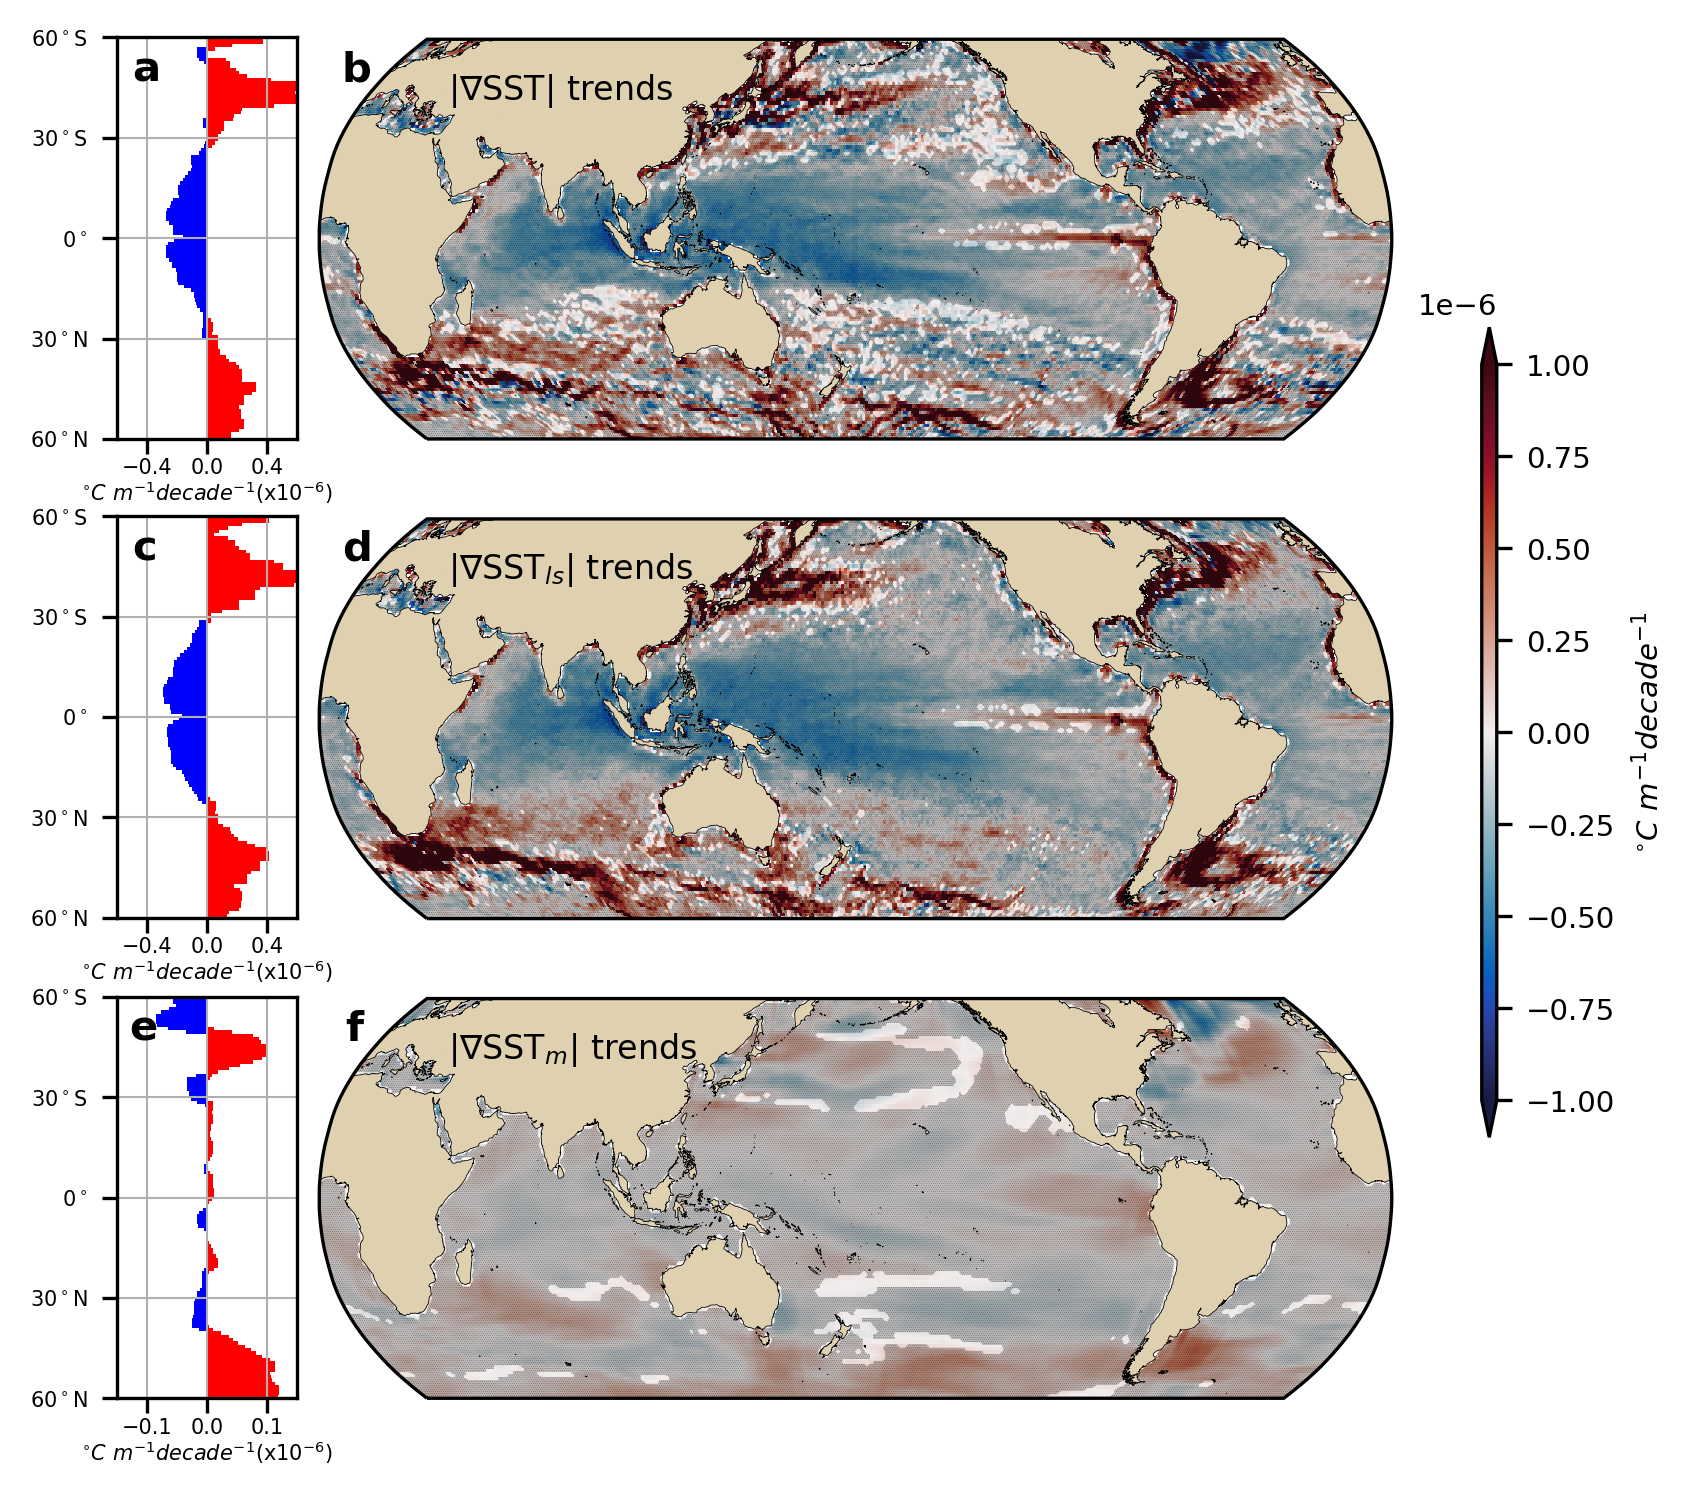

In [9]:
plt.rcParams['xtick.major.pad']='1'
plt.rc('hatch', color='k', linewidth=0.03)

fig = plt.figure(figsize=(5, 6),dpi=300)

##################################################################################################
## Subplot##
##################################################################################################

ax1=fig.add_subplot(3, 1, 1,projection= ccrs.Robinson(central_longitude=180))
clm1= sst_grad_t.plot(vmin=-1e-6,vmax=1e-6,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land, zorder=2)
add_patches(ax1)
cs=sst_grad_s.where(sst_grad_s==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

ax2=fig.add_subplot(3, 1, 2,projection= ccrs.Robinson(central_longitude=180))
clm2= m_sst_grad_t.plot(vmin=-1e-6,vmax=1e-6,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land, zorder=2)
add_patches(ax2)

cs = m_sst_grad_s.where(m_sst_grad_s==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

ax3=fig.add_subplot(3, 1, 3,projection= ccrs.Robinson(central_longitude=180))
clm3=l_sst_grad_t.plot(vmin=-1e-6,vmax=1e-6,transform=ccrs.PlateCarree(),cmap=cm.cm.balance, add_colorbar=False, rasterized=True)
ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(ccrs_land, zorder=2)
add_patches(ax3)

cs = l_sst_grad_s.where(l_sst_grad_s==1).plot.contourf(transform=ccrs.PlateCarree(), colors='none',alpha=0.2,hatches=['...'*8, '/'], add_colorbar=False)
vectorize(cs)

##################################################################################################

ax1.text(0.12,0.85,r'$|\nabla \mathrm{SST}|$ trends',fontsize=8,transform=ax1.transAxes)
ax2.text(0.12,0.85,r'$|\nabla \mathrm{SST}_{ls}|$ trends',fontsize=8,transform=ax2.transAxes)
ax3.text(0.12,0.85,r'$|\nabla \mathrm{SST}_{m}|$ trends',fontsize=8,transform=ax3.transAxes)

##################################################################################################

ax_w = plt.axes([0.02, 0.658, 0.12, 0.223])

increase_sst=(sst_grad_t*1e6).mean('x')

pos=np.ma.masked_where(increase_sst<0, increase_sst)
ax_w.barh(increase_sst.y,pos, align='center', height=3, color='r')

neg=np.ma.masked_where(increase_sst>0, increase_sst)

ax_w.barh(increase_sst.y,neg, align='center', height=3, color='b')

ax_w.set_ylim(-60,60)
ax_w.set_xlim(-0.6,0.6)
ax_w.set_xlabel("$^{\circ}C\ m^{-1} decade^{-1}  (\mathrm{x10}^{-6})$",fontsize=5)
ax_w.xaxis.set_label_coords(0.5, -0.1)
ax_w.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w.tick_params(axis='both', which='major', labelsize=5)
ax_w.set_yticks(range(-60,61,30))
ax_w.set_yticklabels(['60$^\circ$N','30$^\circ$N','0$^\circ$','30$^\circ$S','60$^\circ$S'])
ax_w.grid(linewidth=0.5)
ax_w.text(-0.5,47,'a',fontweight='bold')
ax_w.text(0.9,47,'b',fontweight='bold')

###############################################################
ax_w1 = plt.axes([0.02, 0.125, 0.12, 0.223])

zonal_sst_grad=(l_sst_grad_t*1e6).mean('x')

pos=np.ma.masked_where(zonal_sst_grad<0, zonal_sst_grad)
ax_w1.barh(zonal_sst_grad.y,pos, align='center', height=3, color='r')

neg=np.ma.masked_where(zonal_sst_grad>0, zonal_sst_grad)

ax_w1.barh(zonal_sst_grad.y,neg, align='center', height=3, color='b')

ax_w1.set_ylim(-60,60)
ax_w1.set_xlim(-0.15,0.15)
ax_w1.set_xlabel("$^{\circ}C\ m^{-1} decade^{-1}  (\mathrm{x10}^{-6})$",fontsize=5)
ax_w1.xaxis.set_label_coords(0.5, -0.1)
ax_w1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w1.tick_params(axis='both', which='major', labelsize=5)
ax_w1.set_yticks(range(-60,61,30))
ax_w1.set_yticklabels(['60$^\circ$N','30$^\circ$N','0$^\circ$','30$^\circ$S','60$^\circ$S'])
ax_w1.grid(linewidth=0.5)
ax_w1.text(-0.13,47,'e',fontweight='bold')
ax_w1.text(0.23,47,'f',fontweight='bold')

###############################################################
ax_w2 = plt.axes([0.02, 0.392, 0.12, 0.223])

zonal_sum_sst_grad_mean=(m_sst_grad_t*1e6).mean('x')

pos=np.ma.masked_where(zonal_sum_sst_grad_mean<0, zonal_sum_sst_grad_mean)
ax_w2.barh(zonal_sum_sst_grad_mean.y,pos, align='center', height=3, color='r')

neg=np.ma.masked_where(zonal_sum_sst_grad_mean>0, zonal_sum_sst_grad_mean)

ax_w2.barh(zonal_sum_sst_grad_mean.y,neg, align='center', height=3, color='b')

ax_w2.set_ylim(-60,60)
ax_w2.set_xlim(-0.6,0.6)
ax_w2.set_xlabel("$^{\circ}C\ m^{-1} decade^{-1} (\mathrm{x10}^{-6})$",fontsize=5)
ax_w2.xaxis.set_label_coords(0.5, -0.1)
ax_w2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w2.tick_params(axis='both', which='major', labelsize=5)
ax_w2.set_yticks(range(-60,61,30))
ax_w2.set_yticklabels(['60$^\circ$N','30$^\circ$N','0$^\circ$','30$^\circ$S','60$^\circ$S'])
ax_w2.grid(linewidth=0.5)
ax_w2.text(-0.5,47,'c',fontweight='bold')
ax_w2.text(0.9,47,'d',fontweight='bold')

##################################################################################################
##################################################################################################
##################################################################################################


cbar_ax = fig.add_axes([0.93, 0.27, 0.01, 0.45])
cbar=fig.colorbar(clm1, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('$^{\circ}C\ m^{-1} decade^{-1}$', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.yaxis.get_offset_text().set(size=7)

plt.savefig('../../LaTeX/figures/global_SST_diff_scales_trends.pdf',dpi=300,bbox_inches='tight')

**Extended Data Figure 3 | Sea surface temperature gradient magnitude trend scale analysis.** Large-scale SST gradient magnitudes are computed by filtering the SST field with a 3◦kernel filter and a running average of 12 months before computing the gradient magnitudes and their respective trends (see Methods).  The small scales correspond to the gradients of the SST minus the large-scale filtered SST field.  (a) Zonally averaged SST gradient magnitude trends; (b) map of SST gradient magnitude trends; (c) zonally averaged small-scale SST gradient magnitude trends; (d) map of small-scale SST gradient magnitude trends; (e) zonally averaged large-scale SST gradient magnitude trends; (f)map of large-scale SST gradient magnitude trends. In panels (b), (d) and (f) gray stippling shows regions where the trends are statistically significant above the 95% confidence level.
